In [1]:
#Let's (1) import pandas; (2) use pandas to read a .csv file; and (3) let's define a variable, 'values', that contains our data that we will analyze

import pandas as pd
df = pd.read_csv('sample.csv')
values = df['Value']

In [2]:
#Now we will (1) import SciPy.stats, which is able to fit our data to relevant probability distributions; and
#(2) let's fit our data to a normal, lognormal, and gamma distribution.

#Note 1: For the lognormal and gamma distribution, SciPy defines the probability distributions as 3-parameter models (e.g., https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html)
#Note 2: However, it is generally more common to define a distribution such as log-normal as a 2-paramter model (e.g., https://en.wikipedia.org/wiki/Log-normal_distribution)
#Note 3: For the 2 reasons above, floc is set to zero, but you can obviously fit a model without doing so ahead of time.

import scipy.stats as ss
normfit = ss.norm.fit(values)
lognormfit = ss.lognorm.fit(values, floc = 0)
gammafit = ss.gamma.fit(values, floc = 0)

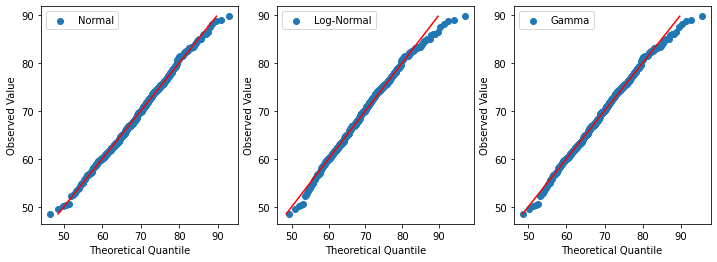

In [3]:
#Let's bring in matplotlib, which we can use to create our graphical visuals.

import matplotlib.pyplot as plt

#Here we will define a plot composed of 3 sub-plots, each side-by-side, for each distribution.

fig, ax = plt.subplots(1,3, figsize = (12,4))

#SciPy contains 'probplot', which can be used to extract the theoretical quantiles for our selected distributions vs. the data
# Note: 'fit' will fit a best-fit line to our probability plot. Let's not do that (which is why it is set to False), as we will instead add a 45-degree red line shortly)
# Full documentation can be found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

norm = ss.probplot(values,sparams=normfit, dist=ss.norm, plot = None, fit = False)
lognorm = ss.probplot(values,sparams=lognormfit, dist=ss.lognorm, plot = None, fit = False)
gamma = ss.probplot(values,sparams=gammafit, dist=ss.gamma, plot = None, fit = False)

#For each subplot, let's add a scatter plot.

ax[0].scatter(norm[0],norm[1], alpha = 1, label = 'Normal')
ax[1].scatter(lognorm[0],lognorm[1], label = 'Log-Normal')
ax[2].scatter(gamma[0],gamma[1],  label = 'Gamma')

#For our 3 subplots, let's:
#(1) Add a red line that is 45 degrees, bounded by our min and max values
#(2) Add our x- and y-labels as well as legend, which is based on the label's for each scatter plot.

for i in range(3):
    ax[i].plot([min(values),max(values)], [min(values), max(values)], color = 'r')
    ax[i].set_xlabel('Theoretical Quantile')
    ax[i].set_ylabel('Observed Value')
    ax[i].legend()

#Finally, let's show the plot.

plt.show()